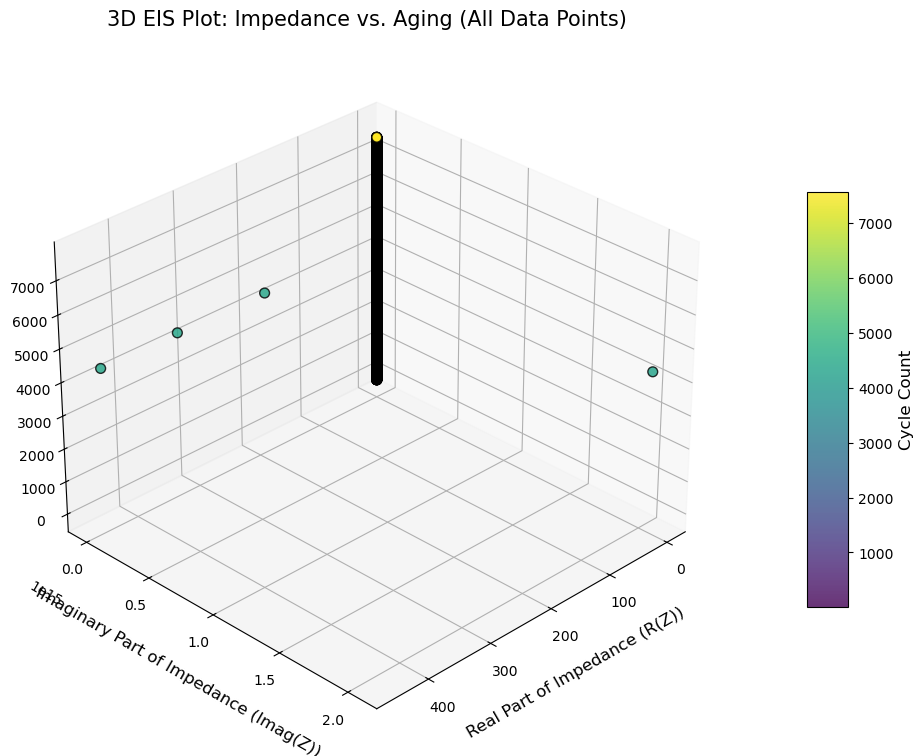

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to clean and extract real values
def extract_real_values(column):
    def clean_value(x):
        if isinstance(x, str):
            x = x.replace("(", "").replace(")", "")  # Remove parentheses
            if "-" in x:  # Handle complex-like format
                x = x.split("-")[0]
        try:
            return float(x)
        except ValueError:
            return np.nan  # Handle invalid entries as NaN
    return column.apply(clean_value)

# Load the dataset
csv_file_path = "/Users/yadhu/work/Assingnment/cleaned_dataset/metadata.csv"  
data = pd.read_csv(csv_file_path)

# Extract and clean relevant columns
RZ = extract_real_values(data['Re']) 
ImagZ = extract_real_values(data['Rct'])  

# Replace missing or invalid values with zero
RZ = RZ.fillna(0)  
ImagZ = ImagZ.fillna(0)  

# Generate Cycle Count as a sequence
CycleCount = np.arange(1, len(RZ) + 1)

# Create a 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot all data points
sc = ax.scatter(
    RZ, ImagZ, CycleCount,
    c=CycleCount, cmap='viridis', marker='o',
    edgecolor='k', alpha=0.8, s=50  # Add edge color and transparency
)

# Add a color bar
color_bar = plt.colorbar(sc, ax=ax, shrink=0.6, aspect=10, pad=0.1)
color_bar.set_label("Cycle Count", fontsize=12)
color_bar.ax.tick_params(labelsize=10)

# Customize axis labels and title
ax.set_xlabel("Real Part of Impedance (R(Z))", fontsize=12, labelpad=10)
ax.set_ylabel("Imaginary Part of Impedance (Imag(Z))", fontsize=12, labelpad=10)
ax.set_zlabel("Cycle Count", fontsize=12, labelpad=10)
ax.set_title("3D EIS Plot: Impedance vs. Aging (All Data Points)", fontsize=15, pad=20)

# Add gridlines and adjust view angle
ax.grid(True, linestyle='--', alpha=0.5)
ax.view_init(elev=30, azim=45)  # Adjust view angles

# Highlight axes ticks for better readability
ax.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.show()


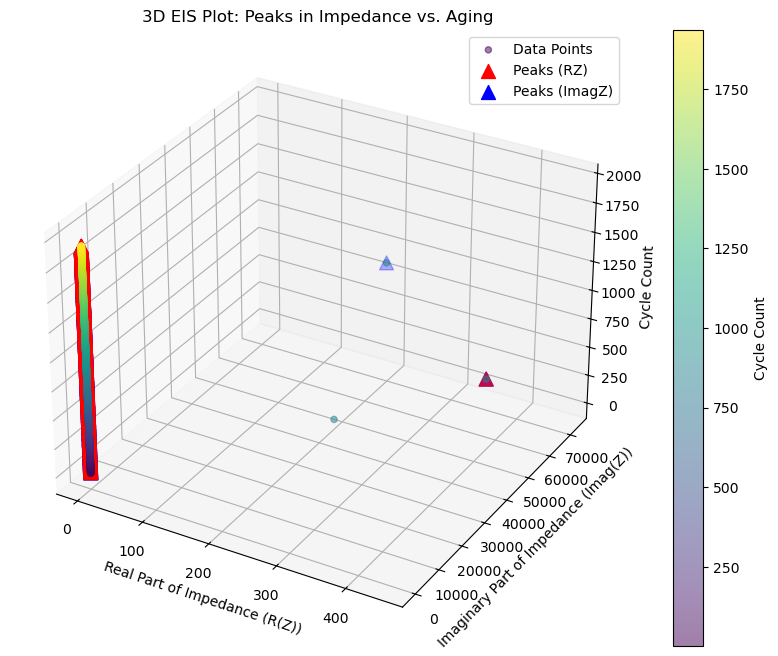

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks

# Function to clean and extract real values, handling potential issues in 'Re' column
def extract_real_values(column):
    def clean_value(x):
        if isinstance(x, str):
            x = x.replace("(", "").replace(")", "")  # Remove parentheses
            if "-" in x:  # Handle potential negative or complex-like format
                x = x.split("-")[0]
        try:
            return float(x)
        except ValueError:
            return np.nan  # Handle invalid entries as NaN
    return column.apply(clean_value)

# Load the dataset
csv_file_path = "/Users/yadhu/work/Assingnment/cleaned_dataset/metadata.csv"  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file_path)

# Extract and clean relevant columns
RZ = extract_real_values(data['Re'])  # Replace 'Re' with the actual column name for Real(Z)
ImagZ = extract_real_values(data['Rct'])  # Replace 'Rct' with the actual column name for Imag(Z)

# Drop rows with NaN values in the cleaned data
valid_data = ~np.isnan(RZ) & ~np.isnan(ImagZ)
RZ = RZ[valid_data]
ImagZ = ImagZ[valid_data]

# Generate Cycle Count as a sequence for the filtered data
CycleCount = np.arange(1, len(RZ) + 1)

# Detect peaks in RZ and ImagZ
peaks_RZ, _ = find_peaks(RZ)
peaks_ImagZ, _ = find_peaks(ImagZ)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data
sc = ax.scatter(RZ, ImagZ, CycleCount, c=CycleCount, cmap='viridis', marker='o', alpha=0.5, label='Data Points')

# Plot the detected peaks
ax.scatter(RZ.iloc[peaks_RZ], ImagZ.iloc[peaks_RZ], CycleCount[peaks_RZ], c='red', marker='^', s=100, label='Peaks (RZ)')
ax.scatter(RZ.iloc[peaks_ImagZ], ImagZ.iloc[peaks_ImagZ], CycleCount[peaks_ImagZ], c='blue', marker='^', s=100, label='Peaks (ImagZ)')

# Add color bar
color_bar = plt.colorbar(sc, ax=ax)
color_bar.set_label("Cycle Count")

# Label the axes
ax.set_xlabel("Real Part of Impedance (R(Z))")
ax.set_ylabel("Imaginary Part of Impedance (Imag(Z))")
ax.set_zlabel("Cycle Count")
ax.set_title("3D EIS Plot: Peaks in Impedance vs. Aging")
ax.legend()

# Show the plot
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error (MSE): 1.2119
Mean Absolute Error (MAE): 0.8954
R-squared (R2): 0.9767
   Example Index                                           Features  \
0              0  {'Real Impedance (R(Z))': 77.19458621308237, '...   
1              1  {'Real Impedance (R(Z))': 97.8553714145801, 'I...   
2              2  {'Real Impedance (R(Z))': 8.54263781522748, 'I...   
3              3  {'Real Impedance (R(Z))': 29.04663258138005, '...   
4              4  {'Real Impedance (R(Z))': 108.90797687113117, ...   

   Actual Current Capacity  Predicted Current Capacity  Difference  
0                34.123634                   33.010536    1.113098  
1                29.129595                   27.925498    1.204097  
2                49.831942                   48.201632    1.630310  
3                43.178298                   43.299057   -0.120758 

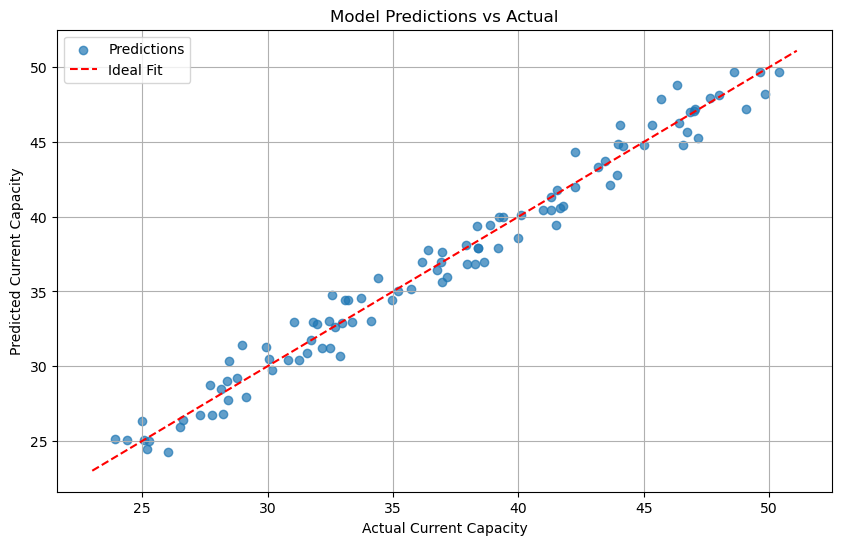

Model Evaluation (Full Test Set):
RMSE: 1.1009
MAE: 0.8954


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic EIS signature data and current capacity for ML model
np.random.seed(42)
n_samples = 500
real_impedance = np.random.uniform(0, 120, n_samples)  # Simulated R(Z) in kΩ
imag_impedance = np.random.uniform(0, 40, n_samples)  # Simulated Im(Z) in kΩ
current_capacity = 50 - 0.2 * real_impedance - 0.1 * imag_impedance + np.random.normal(0, 1, n_samples)  # Simulated capacity
data_ml = pd.DataFrame({
    "Real Impedance (R(Z))": real_impedance,
    "Imaginary Impedance (Im(Z))": imag_impedance,
    "Current Capacity": current_capacity
})

# Split the data into training and testing sets
X = data_ml[["Real Impedance (R(Z))", "Imaginary Impedance (Im(Z))"]]
y = data_ml["Current Capacity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
example_results = []
for idx in range(min(5, len(X_test))):  # Up to 5 examples
    features = X_test.iloc[idx:idx+1]
    actual = y_test.iloc[idx]
    prediction = best_model.predict(features)[0]
    example_results.append({
        "Example Index": idx,
        "Features": features.iloc[0].to_dict(),
        "Actual Current Capacity": actual,
        "Predicted Current Capacity": prediction,
        "Difference": actual - prediction
    })

example_results_df = pd.DataFrame(example_results)
print(example_results_df)
# Plot true vs predicted capacities
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Current Capacity")
plt.ylabel("Predicted Current Capacity")
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid()
plt.show()

# Metrics
print("Model Evaluation (Full Test Set):")
print(f"RMSE: {np.sqrt(mse):.4f}")
print(f"MAE: {mae:.4f}")

